# Factors impacting APR rate
## by: Reem Mandour

## Investigation Overview

The investigation inspects the key factors that affect APR rate of borrowers taking loans under the service management of prosper. The factors are: credit score, prosper score (risk), Employment status(employed or not),  monthly income of borrower, loan requested.

## Dataset Overview

The data contain the loans' attributes throughout the loans' lifecyle. Some of these variables are Borrower's income, the loan requested, the monthly loan pay, the number of on time payments on the loan, and more. The dataset has 113,937 rows with 81 variables describing the loan and borrower . These rows were loaded and insights were conducted to reach a conclusion about APR rate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to hide the warnings displayed 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data from CSV file
df_loan_Data = pd.read_csv('prosperLoanData.csv')

In [3]:
# take a copy of dataset to work on
df_loan_Data_copy = df_loan_Data.copy()

Note that the above cells have been set as "Skip"-type slides. That means that when the notebook is rendered as http slides, those cells won't show up.

# Visualizations

### The APR rates:

the APR Rates are skewed right, which gives a positive indication that we have clients with good credit scores and overall healthy loan eligibilty status. If we take the log scale, we will find multiplicative values skewed left to approach zero from $ 10 ^{-2} $.

min value: 0.006529999999999999, max value: 0.5122899999999999, mean: 0.21882765590982514


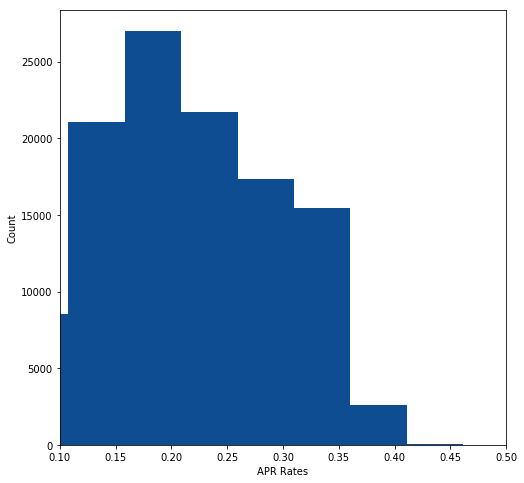

In [4]:
# Let's check APR rate to see what APR rates we have.
print('min value: {}, max value: {}, mean: {}'.format(df_loan_Data_copy.BorrowerAPR.min(), df_loan_Data_copy.BorrowerAPR.max(), df_loan_Data_copy.BorrowerAPR.mean()))
np_array_APR = df_loan_Data_copy.BorrowerAPR.sort_values(ascending=True).values
np_array_APR = np_array_APR[np.logical_not(np.isnan(np_array_APR))]  # ref [8] for removing NANs from array
plt.figure(figsize=[8, 8])
plt.hist(np_array_APR, bins=10, color='#0f4d92')
plt.xlim([0.1,0.5])
plt.xlabel('APR Rates')
plt.ylabel('Count')
plt.show();

### The Loan Term, Employment Status and Prosper Score

Most of loan durations are 36 months, next comes the duration of 60 months and least is 12 months. Most of the borrowers in total are employed whether full-time, part-time, self-employed or just employed.But, here comes the prosper score which has considerable count of low score 4 besides a considerable count of 8 and 9 average score with very little high score of 10 and 11. Since we perceived risk unexpected insight, let us take a look deeper in data through bivariate and multivariate to see whether these scores in turn impacts the APR.

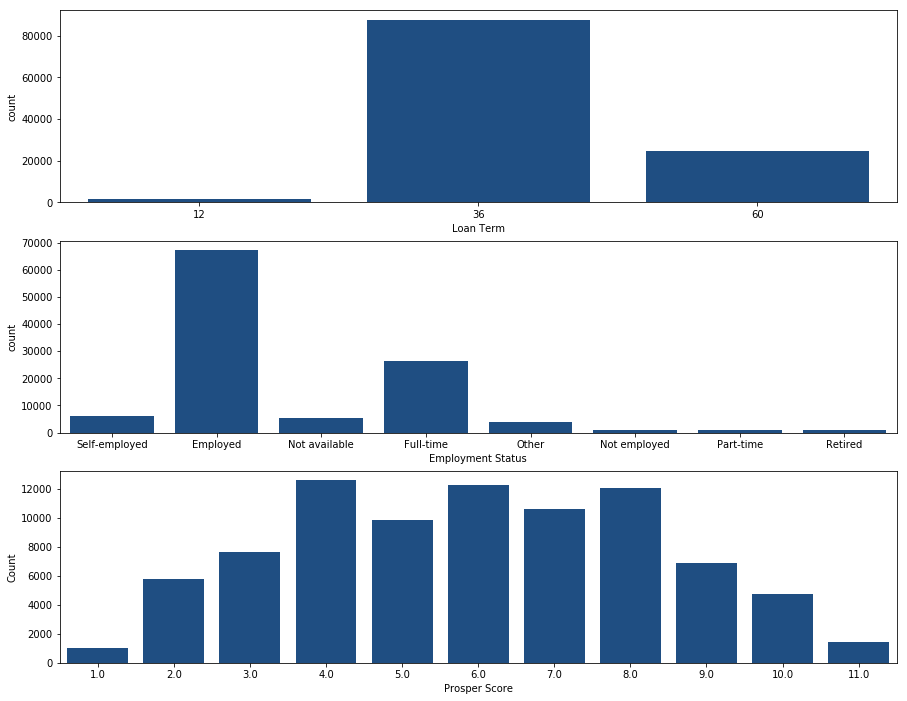

In [5]:
fig, ax = plt.subplots(nrows=3, figsize=[15, 12])
sns.countplot(data=df_loan_Data_copy, x='Term', color='#0f4d92', ax=ax[0])
ax[0].set_xlabel('Loan Term')

sns.countplot(data=df_loan_Data_copy, x='EmploymentStatus', color='#0f4d92', ax=ax[1])
ax[1].set_xlabel('Employment Status')

sns.countplot(data=df_loan_Data_copy, x='ProsperScore', color='#0f4d92', ax=ax[2])
ax[2].set_xlabel('Prosper Score')

plt.ylabel('Count')
plt.show()

### The Credit Score of borrowers

Most of the credit scores are in ranges from 600 to 800. It looks there are borrowers who really can handle the responsibility of covering their loans. these ranges are expected to have good APRs.

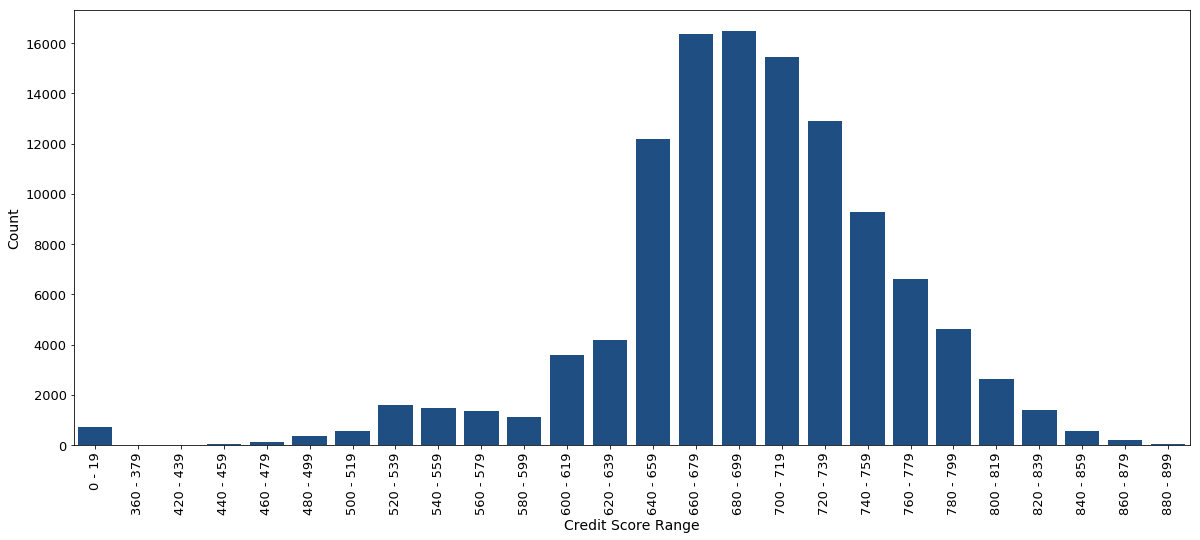

In [6]:
# fill NAN values with zero
df_loan_Data_copy.CreditScoreRangeLower.fillna(0, inplace=True)
df_loan_Data_copy.CreditScoreRangeUpper.fillna(19, inplace=True)
# convert to int64
df_loan_Data_copy.CreditScoreRangeLower = df_loan_Data_copy.CreditScoreRangeLower.astype(np.int64)
df_loan_Data_copy.CreditScoreRangeUpper = df_loan_Data_copy.CreditScoreRangeUpper.astype(np.int64)

# add to dataset a new column : Credit score range
credit_cols = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
df_loan_Data_copy['CreditScoreRange'] = df_loan_Data_copy[credit_cols].apply(lambda row: ' - '.join(row.values.astype(str)), axis=1)
#df_loan_Data_copy.head()
order_desc = df_loan_Data_copy.CreditScoreRange.sort_values(ascending=True)
order_desc = order_desc.astype('category')
#order_desc.cat.categories

#plot the credit score histogram
plt.figure(figsize=[20, 8])
sns.countplot(data=df_loan_Data_copy, x='CreditScoreRange', color='#0f4d92', order=order_desc.cat.categories)

plt.xlabel('Credit Score Range', fontsize=14)
plt.xticks(rotation='vertical', fontsize=13)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=13)
plt.show();

### The Borrowers Monthly Income

The Monthly income is rightly skewed toward incomes less than 100K, besides the peak salaries gather around mean value more, with some outliers.

min value: 0.0, max value: 1750002.916667, mean: 5608.025568224852


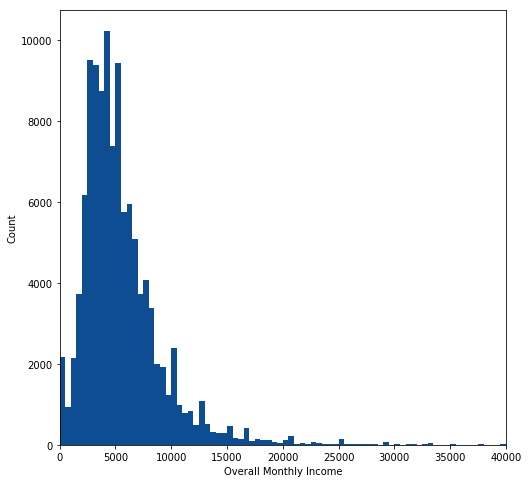

In [7]:
# plot histogram of  StatedMonthlyIncome column
print('min value: {}, max value: {}, mean: {}'.format(df_loan_Data_copy.StatedMonthlyIncome.min(), df_loan_Data_copy.StatedMonthlyIncome.max(), df_loan_Data_copy.StatedMonthlyIncome.mean()))
binsize = 500
bins = np.arange(0, 200000, binsize)


plt.figure(figsize=[8, 8])
plt.hist(data=df_loan_Data_copy,x='StatedMonthlyIncome', bins=bins, color='#0f4d92')
plt.xlabel('Overall Monthly Income')
plt.xlim(0, 40000)
plt.ylabel('Count')
plt.show();

### The Loan Durations, Loan Amounts and Monthly Payments

The peak loan durations are between 0 and 20 with average duration in range 20-60 and 80-100. The loan amounts overall are not large with peak values at 5000, 10000, 15000. Also, the overall amounts of loan and monthly payment compared to monthly income of borrowers shows positive measure that loans can get covered within their durations. 

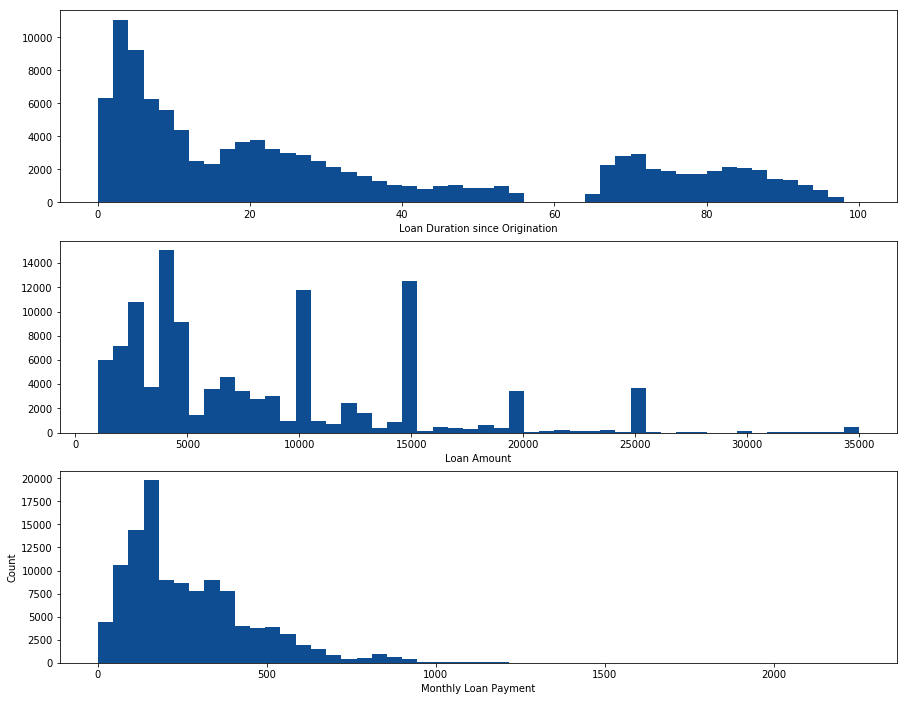

In [8]:
fig, ax = plt.subplots(nrows=3, figsize=[15, 12])

ax[0].hist(data=df_loan_Data_copy, x='LoanMonthsSinceOrigination', color='#0f4d92', bins=50)
ax[0].set_xlabel('Loan Duration since Origination')

ax[1].hist(data=df_loan_Data_copy, x='LoanOriginalAmount', color='#0f4d92', bins=50)
ax[1].set_xlabel('Loan Amount')

ax[2].hist(data=df_loan_Data_copy, x='MonthlyLoanPayment', color='#0f4d92', bins=50)
ax[2].set_xlabel('Monthly Loan Payment')


plt.ylabel('Count')
plt.show()

### The effect of key numeric factors on APR:

The  heatmat uses spearman's method.Variabes show weak to moderate correlation relationships with the APR rate. The data has correct logical correlation between variables in terms of positive or negative correlation. The reason behind using spearman instead of default pearson method in correlation calculation is the data is not normally distributed but right skewed toward specific range as shown in previous plots.

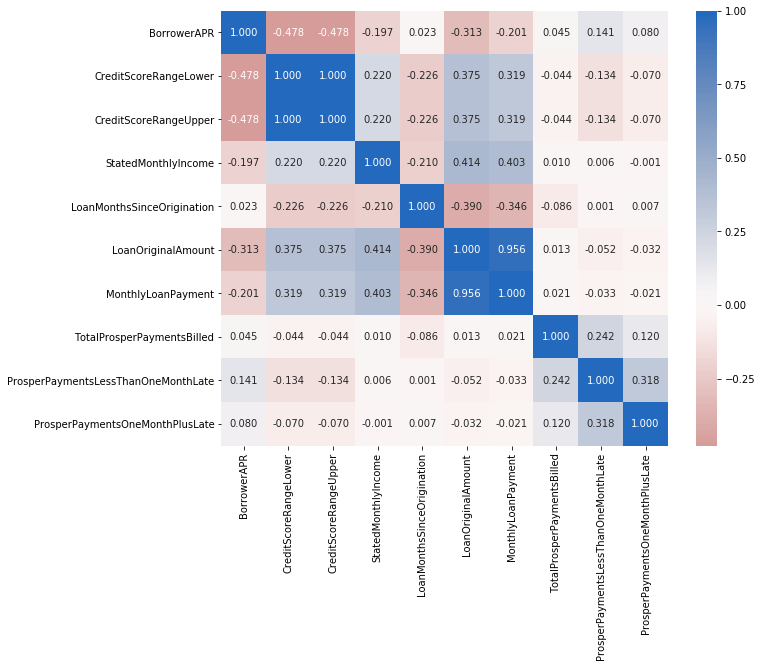

In [9]:
# numeric continuous variables
numeric_variables = ['BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
                     'StatedMonthlyIncome', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
                     'MonthlyLoanPayment', 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate',
                     'ProsperPaymentsOneMonthPlusLate']

# Categorical nominal and ordinal variables
#categorical_variables = ['Term', 'EmploymentStatus', 'ProsperScore', 'IsBorrowerHomeowner']

# Heat map plot
plt.figure(figsize=[10, 8])
sns.heatmap(df_loan_Data_copy[numeric_variables].corr(method='spearman'), annot=True,  fmt = '.3f',
           cmap = 'vlag_r', center = 0);

### The APR distribution on different prosper scores:

We have most of borrowers in risk score ranging from 3 to 8. The peak APR rates for 3 is high since it is considered a bad score. We start getting slightly lower peak APR rates at score 4. Score 5 has also high APR rates. From range 6 to 8, There areoverall good APR rates, and great APR rates for range 9 to 11. The thing is we do have a small proportion of borrowers in best case range 9 to 11.

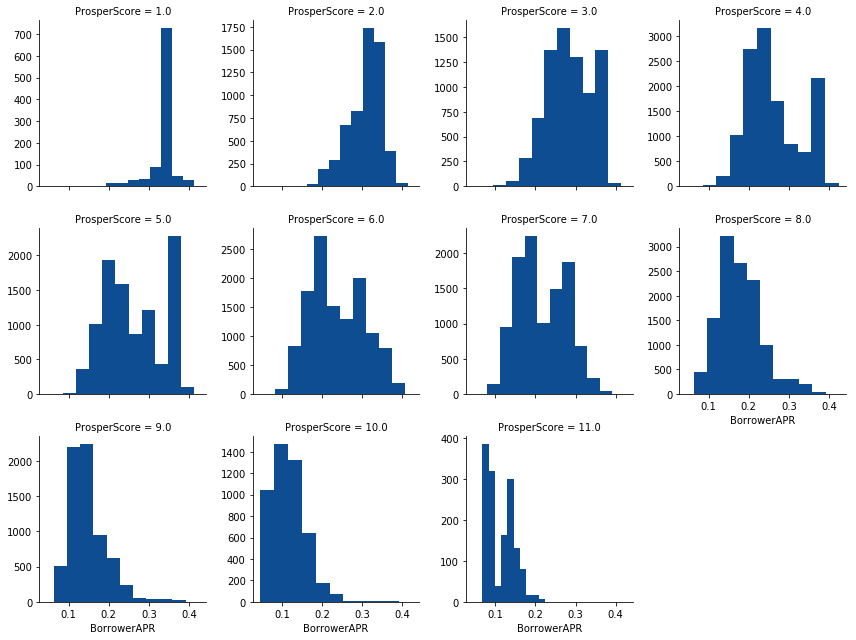

In [10]:
# Convert the "ProsperScore" column from a float into an ordered categorical type
df_loan_Data_copy.ProsperScore = df_loan_Data_copy.ProsperScore.sort_values(ascending=True)
df_loan_Data_copy.ProsperScore = df_loan_Data_copy.ProsperScore.astype('category')
#df_loan_Data_copy.ProsperScore.cat.categories

# Plot facet grid
graph = sns.FacetGrid(data=df_loan_Data_copy, col='ProsperScore', col_wrap=4, sharey=False)
graph.map(plt.hist, 'BorrowerAPR', color='#0f4d92');

### The APR distribution on different Employment Status:

The majority of borrowers are Employed(Employed, fulltime, parttime, selfemployed) and retired, with just small proportion not employed and not specified(not available). The APR rates are low for employed category.

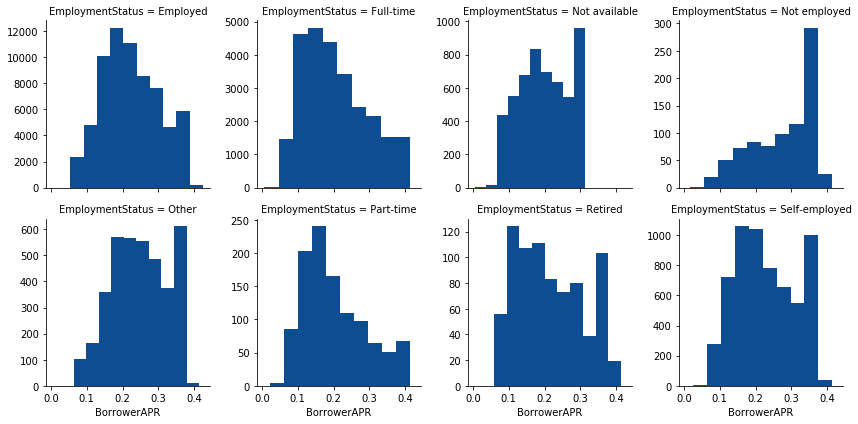

In [11]:
# Convert the "EmploymentStatus" column from a object into an nominal categorical type
df_loan_Data_copy.EmploymentStatus = df_loan_Data_copy.EmploymentStatus.astype('category')
df_loan_Data_copy.EmploymentStatus.cat.categories

# Plot facet grid
graph = sns.FacetGrid(data=df_loan_Data_copy, col='EmploymentStatus', col_wrap=4, sharey=False)
graph.map(plt.hist, 'BorrowerAPR', color='#0f4d92');

In [12]:
# To compute the logarithm of any numeric continuous variable
def sqrt_log_trans(x, inverse=False):
    """Function to compute square root of log and power operations over variables or columns"""
    if not inverse:
        return np.sqrt(np.log10(x))
    else:
        return np.power(10, x)

In [13]:
def sqrt_root_trans(x, inverse = False):
    """ quick function for computing square root and square operations """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

In [14]:
df_loan_Data_copy['Income_sqrt_log'] = df_loan_Data_copy.StatedMonthlyIncome.apply(sqrt_log_trans)
df_loan_Data_copy['APR_sqrt'] = df_loan_Data_copy.BorrowerAPR.apply(sqrt_root_trans)
df_loan_Data_copy['Loan_sqrt_log'] = df_loan_Data_copy.LoanOriginalAmount.apply(sqrt_log_trans)

### The APR linearity with monthly income

The APR and Monthly income are negatively correlated, means higher income borrowers receive low to moderate APRs.

In [15]:
samples = np.random.choice(df_loan_Data_copy.shape[0], 10000, replace = False)
loan_data_samp = df_loan_Data_copy.loc[samples,:]

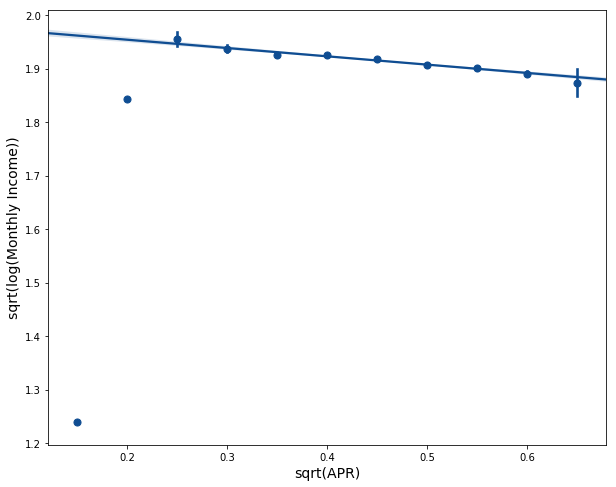

In [16]:
bin_size = 0.050
xbin_range = np.arange(0, loan_data_samp.APR_sqrt.max()+bin_size, bin_size)

plt.figure(figsize=[10, 8])
sns.regplot(loan_data_samp.APR_sqrt, loan_data_samp.Income_sqrt_log, color='#0f4d92', x_bins=xbin_range)
plt.xlabel('sqrt(APR)', fontsize=14)
plt.ylabel('sqrt(log(Monthly Income))', fontsize=14)
plt.show();

### The APR linearity with loan duration

Due to lender's confidence in borrowers' overall score and income, loans are expected to be negatively correlated with APR.

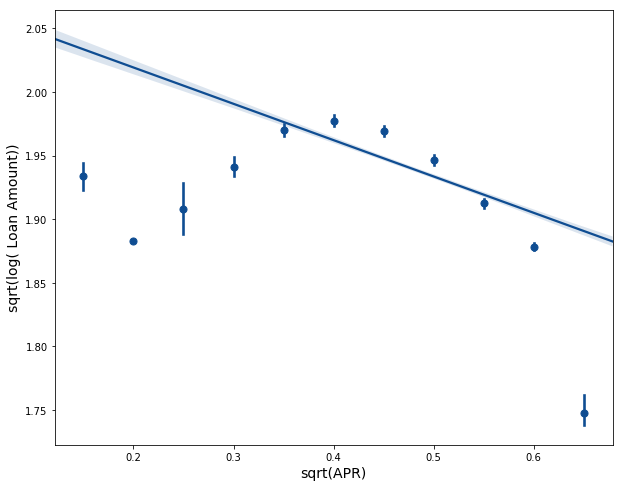

In [17]:
loan_data_samp = df_loan_Data_copy.loc[samples,:]
plt.figure(figsize=[10, 8])
sns.regplot(loan_data_samp.APR_sqrt, loan_data_samp.Loan_sqrt_log ,color='#0f4d92', x_bins=xbin_range)
plt.xlabel('sqrt(APR)', fontsize=14)
plt.ylabel('sqrt(log( Loan Amount))', fontsize=14)
plt.show();

### The Monthly Income and APR rates with different Employment Status

Employed borrowers record covered incomes; as a result, they get expected loans with good range APR rates.But, this is not the case with all borrowers because other factors affect more in APR rate decision.

In [18]:
samples = np.random.choice(df_loan_Data_copy.shape[0], 50000, replace=False)
loan_data_samp = df_loan_Data_copy.loc[samples,:]

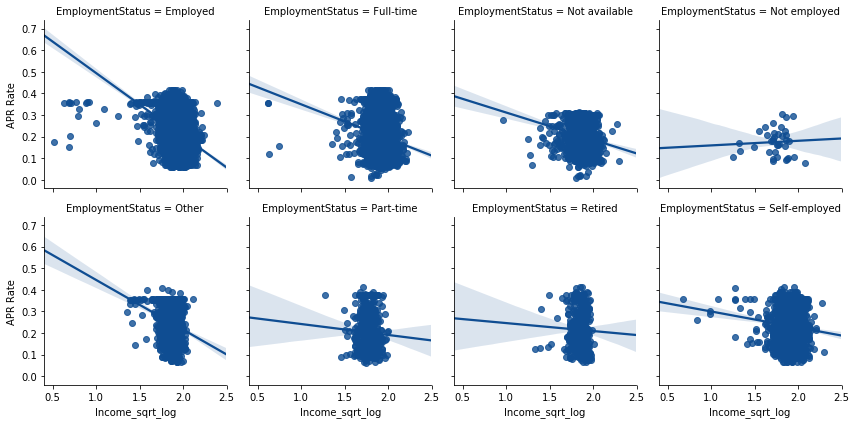

In [19]:
grids = sns.FacetGrid(data = loan_data_samp, col = 'EmploymentStatus', col_wrap = 4, size = 3)
grids.map(sns.regplot, 'Income_sqrt_log', 'BorrowerAPR',color='#0f4d92', scatter=True)
grids.set_ylabels('APR Rate')
grids.set_xlabels('Income_sqrt_log')

plt.show()

### The Monthly Income and APR rates with different Prosper (risk) Scores

The plot shows the decrease in APR rates as prosper scores increase. Most points in graph indicate large population resides in scores 5, 6, 7, 8.

In [20]:
samples = np.random.choice(df_loan_Data_copy.shape[0], 10000, replace=False)
loan_data_samp = df_loan_Data_copy.loc[samples,:]

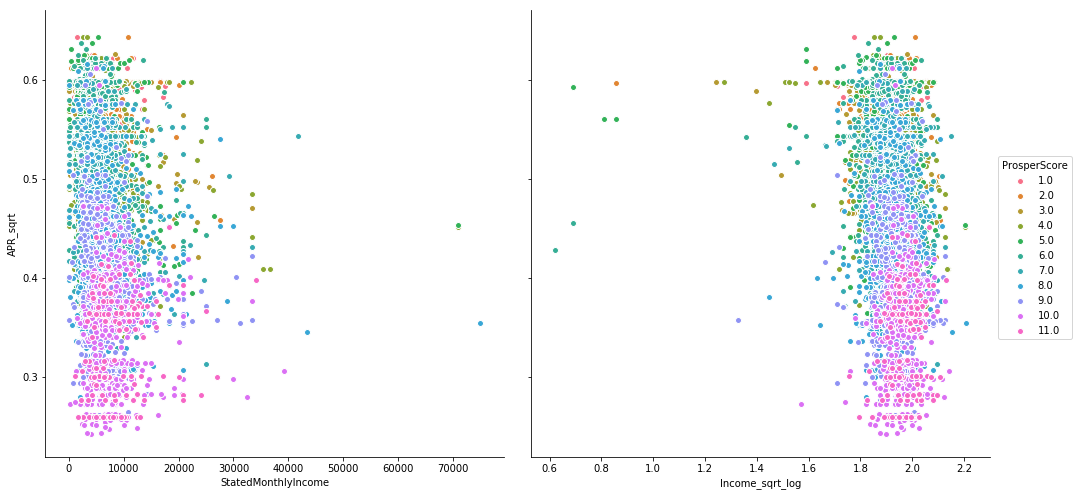

In [21]:
grid = sns.pairplot(
    loan_data_samp,
    x_vars=['StatedMonthlyIncome', 'Income_sqrt_log'],
    y_vars=["APR_sqrt"],
    hue='ProsperScore', 
    palette="husl",
    size=7
)
grid.map_lower(sns.kdeplot, levels=1, color=".2", multiple='stack');

### The APR rate with different Prosper Scores and  Credit Scores

The final plot proves the conclusion that prosper score and credit score takes the priority in decision of APR rate more than income and other factors.

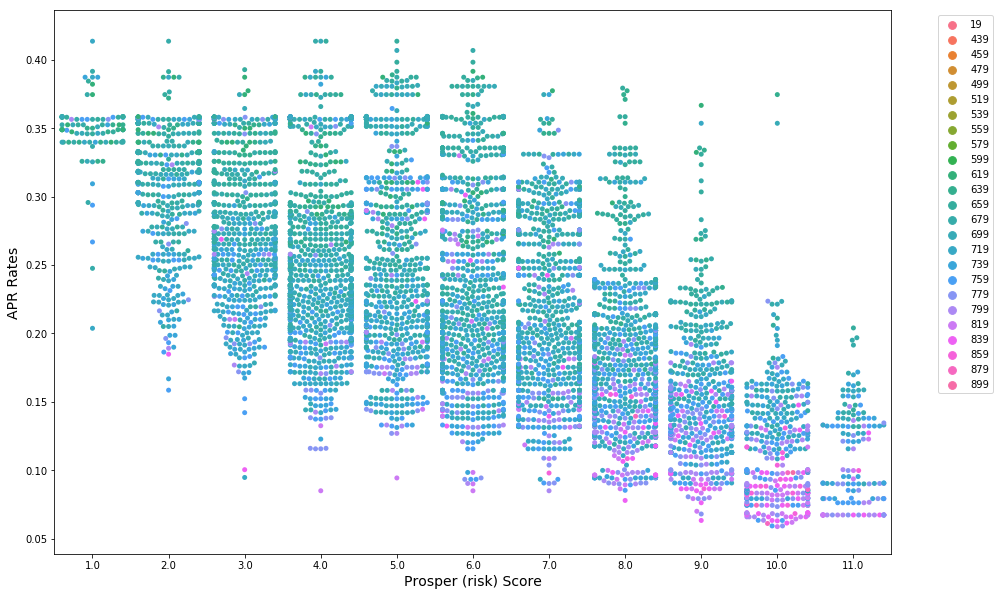

In [22]:
plt.figure(figsize=[15, 10])
sns.swarmplot(x="ProsperScore", y="BorrowerAPR",hue='CreditScoreRangeUpper',palette='husl', data=loan_data_samp)
lg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Prosper (risk) Score', fontsize=14)
plt.ylabel('APR Rates', fontsize=14)
plt.show();

## Conclusion

The data has a lot of  attributes that should be taken into consideration when deciding APRs. In practice, the APR rate is decided based on several factors: The loan duration, the credit score, the risk score, the monthly income and the loan amount. Secondary factors take the next priority after these variables like how committed borrowers were in previous loans, how many on time payments were done in previous loans, how many late payments, and more. Unfortunately, while investigating the sample dataset with key factors, the credit score and prosper score are the main variables and comes next the monthly income, loan duration, loan amount. These variables should all have the APR decided based on them, which is not the case in our sample data. A suggestion is a complete study on the data is required with advanced equations combining all these variables to get an effective and reliable APR rate, which in return will strenghten the correlation between variables. 

The dataset has missing and incorrectly recorded columns that need rectification, for better future measurements and data driven decisions. Some of these data include the income range, the on time payments, the late payments. There are many ways to achieve this like: make the webpage textboxes mandatory, improve the way the program calculates the data and records the results to database, refer back to borrowers and ensure they have these columns filled. 

Another observed point to address is the risk score and credit score. We have very few borrowers with favorable risk scores 9, 10, or 11. This minority in borrowers needs to be addressed, and the reasons behind not having at least half of borrowers with these scores needs further study. The same applies to credit score to study and know the reasons behind having most scores 800 and below with very few exceeding this limit.

A suggestion for loan amount is to keep the borrowers in loan amount ranges based on the scores assigned to them. This would help keep an eye easily for up and down measures of borrowers , and increase the confidence in monthly loan payments on time.